## <p style="background-color:#757D70;color:#D5CABD;font-size:110%;text-align:center;border-radius:20px 60px;  border: 10px solid #cfcfcf;  padding-top: 10px;  padding-left: 10px;  padding-right: 10px; padding-bottom: 10px;  border-radius: 80px 20px;line-height: 1.2em; margin-bottom: 10px;"> **Partie** :Segmentation RFM   </p>

---
- Groupe 2
- Professeur : [**Sayoba GANSANE**]()
- Ecole : [**Université Alioune Diop de Bambey (UADB)**]()
- Projet: [**Data Mining Approche Informatique**]()
- Niveau :  [**Master 2 : Statistique et Informatique Decisionnel (SID)**]()



---

# Importation des librairies

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skimpy
from datetime import *
import warnings
warnings.filterwarnings("ignore")

# Importations des donnnées

In [74]:
data = pd.read_csv("donnees_ecommerce_netoyer.csv", encoding="latin-1")

In [75]:
df =data.copy()

In [76]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Prix,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12


# Aperçu des données

**Definitionn d'une fonction**

In [77]:
#Nombre de variables
def nb_col(base):
    return len(base.columns)

#Nombre d'observation
def nb_lignes(base):     
    return len(base)

#Nombre de valeurs manquantes
def nb_val_manquante(base):
    return base.isna().sum().sum()

#Pourcentage de valeurs manquantes
def freq_val_manquante(base):
    return base.isna().sum().sum()/(base.size)

#Nombre de lignes dupliqués
def nb_lignes_dupliq(base):
    return len(base)-len(base.drop_duplicates())

#Pourcentage de ligne dupliqués
def freq_lignes_dupliq(base):
    return nb_lignes_dupliq(base)/nb_lignes(base)

#Nombre de lignes entierement vide
def nb_lignes_vide(base):
    return base.isna().all(axis=1).sum()

#Pourcentage de ligne entierement vides
def freq_lignes_vide(base):
    return base.isna().all(axis=1).sum()/nb_lignes(base)

##Nombre de colonnes vides
def col_vide(base):
    return base.isnull().all().sum().sum()

##Pourcentage de colonnes vides
def freq_col_vide(base):
    return base.isnull().all().sum().sum()/nb_col(base)

##Nombre de colonnes ayant le même nom
def nom_col_dupliq(base):
    return base.columns.duplicated().sum()

## colonnes dupliquées en fonction des observation même si les noms sont identiques
def getDuplicateColumns(base):
    duplicateColumnNames = set()

    for x in range(base.shape[1]):
        col = base.iloc[:, x]

        for y in range(x + 1, base.shape[1]):
            otherCol = base.iloc[:, y]

            if col.equals(otherCol):
                duplicateColumnNames.add(base.columns.values[y])

    return list(duplicateColumnNames)

## Compter le nombre de colonnes dupliquées
def nb_col_dupliq(base):
    return len(getDuplicateColumns(base))

#### Recupérations des noms des colonnes et Dataframe
def namestr(obj, namespace):
    return [name for name in namespace if namespace[name] is obj]


#Affichage des statistiques globales sur le dataframe
def stat_globale(base):    
    print('Données : {}'.format(namestr(base, globals())))
    print('Nombre de variables : {}'.format(nb_col(base)))
    print('Nombre des observations : {}'.format(nb_lignes(base)))
    print('Nombre de valeurs manquantes : {}'.format(nb_val_manquante(base)))
    print('% valeurs manquantes : {:.2%}'.format(freq_val_manquante(base)))
    print('Nombre de lignes dupliquées : {}'.format(nb_lignes_dupliq(base)))
    print('% de lignes dupliquées : {:.2%}'.format(freq_lignes_dupliq(base)))
    print('Nombre de lignes vides : {}'.format(nb_lignes_vide(base)))
    print('% de lignes vides : {:.2%}'.format(freq_lignes_vide(base)))
    print('Nombre de Colonnes vides : {}'.format(col_vide(base)))
    print('% de colonnes vides : {:.2%}'.format(freq_col_vide(base)))
    print('Nombre de Colonnes ayant le même nom : {}'.format(nom_col_dupliq(base)))
    print('Nombre de Colonnes dupliquées : {}'.format(nb_col_dupliq(base)))
    return None

In [78]:
stat_globale(df)

Données : ['df']
Nombre de variables : 10
Nombre des observations : 392692
Nombre de valeurs manquantes : 0
% valeurs manquantes : 0.00%
Nombre de lignes dupliquées : 0
% de lignes dupliquées : 0.00%
Nombre de lignes vides : 0
% de lignes vides : 0.00%
Nombre de Colonnes vides : 0
% de colonnes vides : 0.00%
Nombre de Colonnes ayant le même nom : 0
Nombre de Colonnes dupliquées : 0


## Description de la base

|Variables| Descriptions
|:--|:--|
|**InvoiceNo** | *numero de la facture à l'achat d'un produit.*|
|**StockCode** | *identifiant unique de l'article.*|
|**Description** | *Description du produit achété.*|
|**Quantity** | *quantité achété.*|
|**InvoiceDate** | *date de la facture.*|
|**UnitPrice** | *prix unitaire.*|
|**CustomerID** | *identifanat unique du client.*|
|**Country** | *pays où la commande a été passé.*|





In [79]:
df.shape

(392692, 10)

In [80]:
df=df.dropna(axis=0)

In [81]:
stat_globale(df)

Données : ['df']
Nombre de variables : 10
Nombre des observations : 392692
Nombre de valeurs manquantes : 0
% valeurs manquantes : 0.00%
Nombre de lignes dupliquées : 0
% de lignes dupliquées : 0.00%
Nombre de lignes vides : 0
% de lignes vides : 0.00%
Nombre de Colonnes vides : 0
% de colonnes vides : 0.00%
Nombre de Colonnes ayant le même nom : 0
Nombre de Colonnes dupliquées : 0


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392692 entries, 0 to 392691
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    392692 non-null  int64  
 1   StockCode    392692 non-null  object 
 2   Description  392692 non-null  object 
 3   Quantity     392692 non-null  int64  
 4   InvoiceDate  392692 non-null  object 
 5   UnitPrice    392692 non-null  float64
 6   CustomerID   392692 non-null  float64
 7   Country      392692 non-null  object 
 8   Total_Prix   392692 non-null  float64
 9   Month        392692 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 30.0+ MB


# Affichage de la date max, min et la durée max

In [83]:
# Conversion en datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')

# Affichage des dates min et max
print("Date début :", df['InvoiceDate'].min())
print("Date de fin  :", df['InvoiceDate'].max())

# Calcul de la durée
duree = df['InvoiceDate'].max() - df['InvoiceDate'].min()
print(f"Durée : {duree}")


Date début : 2010-12-01 08:26:00
Date de fin  : 2011-12-09 12:50:00
Durée : 373 days 04:24:00


In [84]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Total_Prix', 'Month'],
      dtype='object')

In [85]:
# Calcul du montant total
df['Mont_total']=df['Quantity']*df['UnitPrice']

In [86]:
df_invoice=df.groupby(['InvoiceNo', 'InvoiceDate', 'CustomerID']).agg({ 'Mont_total' : lambda x:x.sum()}).reset_index()

In [87]:
df_invoice.columns

Index(['InvoiceNo', 'InvoiceDate', 'CustomerID', 'Mont_total'], dtype='object')

In [88]:
df_invoice.head(3)

,InvoiceNo,InvoiceDate,CustomerID,Mont_total
0,536365,2010-12-01 08:26:00,17850.0,139.12
1,536366,2010-12-01 08:28:00,17850.0,22.20
2,536367,2010-12-01 08:34:00,13047.0,278.73


In [89]:
recPlus1=df_invoice['InvoiceDate'].max()+timedelta(days=1)
recPlus1

Timestamp('2011-12-10 12:50:00')

In [90]:
period=df['InvoiceDate'].max()-df['InvoiceDate'].min()
period

Timedelta('373 days 04:24:00')

In [91]:
df_invoice['recences_calcul']=df_invoice['InvoiceDate'].apply(lambda x: (recPlus1-x).days)

In [92]:
df_invoice.head(3)

,InvoiceNo,InvoiceDate,CustomerID,Mont_total,recences_calcul
0,536365,2010-12-01 08:26:00,17850.0,139.12,374
1,536366,2010-12-01 08:28:00,17850.0,22.20,374
2,536367,2010-12-01 08:34:00,13047.0,278.73,374


## Calcul des tripis indicateurs

In [93]:
aggr = {
    #Recence
    'recences_calcul' : lambda x: x.min(),
    #Frequence
    'InvoiceDate' : lambda x: len([d for d in x if d>=recPlus1-period]),
    #Montant
    'Mont_total' : lambda x: x.sum() }

#Creation du DataFrame avec des Custumer ID distinct

rfm=df_invoice.groupby('CustomerID').agg(aggr).reset_index()

In [94]:
rfm.head(5)

,CustomerID,recences_calcul,InvoiceDate,Mont_total
0,12346.0,326,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40


In [95]:
#Renommage des colonnes
rfm.rename(columns={'recences_calcul' : 'Recence', 	'InvoiceDate' : 'Frequence', 'Mont_total' : 'Montant'}, inplace =True)

In [96]:
rfm.head()

,CustomerID,Recence,Frequence,Montant
0,12346.0,326,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40


# Calcul du montant total

In [97]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Total_Prix', 'Month',
       'Mont_total'],
      dtype='object')

In [98]:
# Calcul du montant total
df['Mont_total']=df['Quantity']*df['UnitPrice']

In [99]:
df_invoice=df.groupby(['InvoiceNo', 'InvoiceDate', 'CustomerID']).agg({ 'Mont_total' : lambda x:x.sum()}).reset_index()

In [100]:
df_invoice.columns

Index(['InvoiceNo', 'InvoiceDate', 'CustomerID', 'Mont_total'], dtype='object')

In [101]:
df_invoice.head(3)

,InvoiceNo,InvoiceDate,CustomerID,Mont_total
0,536365,2010-12-01 08:26:00,17850.0,139.12
1,536366,2010-12-01 08:28:00,17850.0,22.20
2,536367,2010-12-01 08:34:00,13047.0,278.73


In [102]:
rfm.head()

,CustomerID,Recence,Frequence,Montant
0,12346.0,326,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40


# Mise en oeuvre du RFM

In [103]:
# Clacul des quartiles
quartiles= rfm[['Recence', 'Frequence', 'Montant']].quantile([0.25,0.5,0.75]).to_dict()
quartiles

{'Recence': {0.25: 18.0, 0.5: 51.0, 0.75: 142.0},
 'Frequence': {0.25: 1.0, 0.5: 2.0, 0.75: 5.0},
 'Montant': {0.25: 306.4825, 0.5: 668.5699999999999, 0.75: 1660.5975}}

In [104]:
# Definition d'une fonction pour le decoupa des quartile

#recence
def r_score(x) :
    if x<= quartiles['Recence'][0.25] :
        return 4
    elif quartiles['Recence'][0.25] < x <= quartiles['Recence'][0.5]:
        return 3
    elif quartiles['Recence'][0.5] < x <= quartiles['Recence'][0.75]:
        return 2
    else : 
        return 1

#Frequence et le montant
def fm_score(x, col) :
    if x<= quartiles[col][0.25] :
        return 1
    elif quartiles[col][0.25] < x <= quartiles[col][0.5]:
        return 2
    elif quartiles[col][0.5] < x <= quartiles[col][0.75]:
        return 3
    else : 
        return 4

# Ajout de score RFM dans la base rfm

In [105]:
rfm['R']= rfm['Recence'].apply(lambda x: r_score(x))
rfm['F']= rfm['Frequence'].apply(lambda x: fm_score(x, 'Frequence'))
rfm['M']= rfm['Montant'].apply(lambda x: fm_score(x,'Montant'))

#Concatenation des scores RFM
rfm['RFM-concat_score']=rfm['R'].map(str)+rfm['F'].map(str)+rfm['M'].map(str)

In [106]:
rfm.head()

,CustomerID,Recence,Frequence,Montant,R,F,M,RFM-concat_score
0,12346.0,326,1,77183.60,1,1,4,114
1,12347.0,2,7,4310.00,4,4,4,444
2,12348.0,75,4,1797.24,2,3,4,234
3,12349.0,19,1,1757.55,3,1,4,314
4,12350.0,310,1,334.40,1,1,2,112


## Affichage de la carte RFM

![rfm_seg](rfm_seg.png)

In [107]:
Code_segt={
    r'11' : 'Clients en hibernation',
    r'1[2-3]' : 'Clients à risque',
    r'14' : 'Clients à ne pas perdre',
    r'21' : 'Clients presque endormis',
    r'22' : 'Clients à suivre',
    r'[2-3][3-4]' : 'Clients loyaux',
    r'31' : 'Clients prometteurs',
     r'41' : 'Nouveaux clients',
    r'[3-4]2' : 'Clients  potentiellement loyaux',
     r'4[3-4]' : 'Très bon clients',
}

#Ajout du segment RFM dans la base
rfm['Segment']=rfm['R'].map(str)+rfm['F'].map(str)
rfm['Segment']=rfm['Segment'].replace(Code_segt, regex=True)

In [108]:
rfm.head(10)

,CustomerID,Recence,Frequence,Montant,R,F,M,RFM-concat_score,Segment
0,12346.0,326,1,77183.60,1,1,4,114,Clients en hibernation
1,12347.0,2,7,4310.00,4,4,4,444,Très bon clients
2,12348.0,75,4,1797.24,2,3,4,234,Clients loyaux
3,12349.0,19,1,1757.55,3,1,4,314,Clients prometteurs
4,12350.0,310,1,334.40,1,1,2,112,Clients en hibernation
5,12352.0,36,8,2506.04,3,4,4,344,Clients loyaux
6,12353.0,204,1,89.00,1,1,1,111,Clients en hibernation
7,12354.0,232,1,1079.40,1,1,3,113,Clients en hibernation
8,12355.0,214,1,459.40,1,1,2,112,Clients en hibernation
9,12356.0,23,3,2811.43,3,3,4,334,Clients loyaux


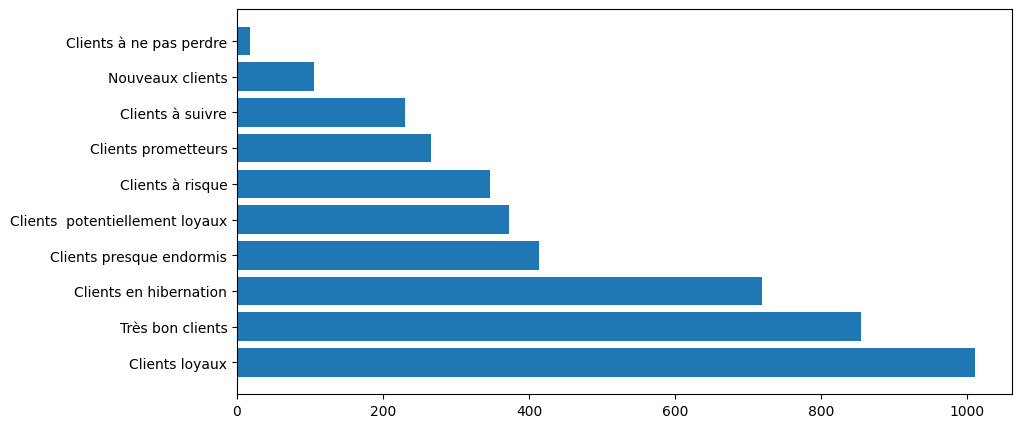

In [109]:
datas=rfm['Segment'].value_counts().to_dict()
segments=list(datas.keys())
values =list(datas.values())

plt.figure(figsize=(10,5))
plt.barh(segments, values)
plt.show()